# Classification with Support Vector Machines



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn import svm, grid_search


import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and funct

## Part 1

In [2]:
df = pd.read_csv('email.txt', delimiter='\t')

df = df.drop(['time','number', 'winner'], axis='columns')
X = df.drop('spam', axis = 'columns')
y = df.spam.values

df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
0,0,0,1,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1
2,0,0,1,0,0,0,0,4,1,0,0,7.773,192,1,0,0,0,6
3,0,0,1,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48
4,0,0,1,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1


## Part 2

In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)

## Part 3

In [4]:
scale_svc_pipe = Pipeline([
    ('scale', MinMaxScaler(feature_range=(-1,1))),
    ('MySVC', SVC(kernel='linear', gamma = 'auto', class_weight = "balanced") )
])

## Part 4

Confusion matrix, without normalization
Model Acuracy is 0.70
Model Precision is 0.22
Model Recall is 0.88


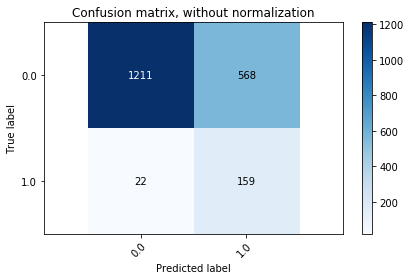

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes=np.array([0.0,1.0]), normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # To show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # Labeling them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Looping over data dimensions and creating text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

scale_svc_pipe.fit(Xtrain, ytrain);

ypreds = scale_svc_pipe.predict(Xtrain)

plot_confusion_matrix(ytrain, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(ytrain, ypreds)

# Sum of diagonal entries divided by total sum
model_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
model_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
model_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Model Acuracy is {model_accuracy:.2f}")
print(f"Model Precision is {model_precision:.2f}")
print(f"Model Recall is {model_recall:.2f}")



## Part 5

In [6]:
cv_scores = cross_val_score(scale_svc_pipe, Xtrain, ytrain, cv = 5, scoring=make_scorer(recall_score))

print(f"Model CV recall is {cv_scores.mean():.2f}")

Model CV recall is 0.88


## Part 6

In [7]:
kernel = ['rbf', 'sigmoid']
gamma = np.linspace(1e-5, 1e-2)
param_grid = {'kernel': kernel, 'gamma': gamma}
svc_gscv = GridSearchCV(svm.SVC(class_weight = "balanced"), param_grid, scoring=make_scorer(recall_score))


In [8]:
svc_gscv.fit(Xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid'], 'gamma': array([1.00000e-05, 2.13878e-04, 4.17755e-04, 6.21633e-04, 8.25510e-04,
       1.02939e-03, 1.23327e-03, 1.43714e-03, 1.64102e-03, 1.84490e-03,
       2.04878e-03, 2.25265e-03, 2.45653e-03, 2.66041e-03, 2.86429e-03,
       3.06816e-03, 3.27204e-03, ... 8.77673e-03, 8.98061e-03,
       9.18449e-03, 9.38837e-03, 9.59224e-03, 9.79612e-03, 1.00000e-02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(recall_score), verbose=0)

In [9]:
svc_gscv.best_params_

{'gamma': 0.003068163265306123, 'kernel': 'rbf'}

## Part 7


In [10]:
print(f'SVC model recall is {svc_gscv.best_score_}')

SVC model recall is 0.8122821177651389


## Part 8:

In [11]:
df2 = pd.DataFrame(svc_gscv.cv_results_)
df2.head(50)

C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*war

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.060039,0.002469,0.017296,4.851386e-04,1e-05,rbf,"{'gamma': 1e-05, 'kernel': 'rbf'}",0.754098,0.816667,0.816667,0.795789,0.029502,24,0.841667,0.826446,0.785124,0.817746,0.023889
1,0.037504,0.009318,0.010054,3.694813e-05,1e-05,sigmoid,"{'gamma': 1e-05, 'kernel': 'sigmoid'}",0.590164,0.683333,0.616667,0.630034,0.039197,51,0.658333,0.652893,0.603306,0.638177,0.024758
2,0.053033,0.004312,0.017140,2.281802e-03,0.000213878,rbf,"{'gamma': 0.0002138775510204082, 'kernel': 'rbf'}",0.721311,0.800000,0.850000,0.790402,0.052980,31,0.816667,0.809917,0.892562,0.839715,0.037470
3,0.054673,0.016136,0.020760,6.214370e-03,0.000213878,sigmoid,"{'gamma': 0.0002138775510204082, 'kernel': 'si...",0.459016,0.283333,0.750000,0.497430,0.192397,52,0.325000,0.355372,0.677686,0.452686,0.159581
4,0.048715,0.002650,0.018946,1.715279e-03,0.000417755,rbf,"{'gamma': 0.0004177551020408164, 'kernel': 'rbf'}",0.721311,0.800000,0.833333,0.784849,0.046976,42,0.833333,0.867769,0.884298,0.861800,0.021230
5,0.049149,0.013883,0.022218,8.026808e-03,0.000417755,sigmoid,"{'gamma': 0.0004177551020408164, 'kernel': 'si...",0.409836,0.283333,0.716667,0.469915,0.181901,54,0.300000,0.330579,0.702479,0.444353,0.182950
6,0.052560,0.000444,0.016285,2.162976e-04,0.000621633,rbf,"{'gamma': 0.0006216326530612246, 'kernel': 'rbf'}",0.786885,0.783333,0.833333,0.801177,0.022776,21,0.883333,0.859504,0.884298,0.875712,0.011467
7,0.050853,0.015511,0.020290,5.894927e-03,0.000621633,sigmoid,"{'gamma': 0.0006216326530612246, 'kernel': 'si...",0.377049,0.283333,0.750000,0.470080,0.201524,53,0.291667,0.330579,0.710744,0.444330,0.189052
8,0.052728,0.000942,0.017711,5.186577e-04,0.00082551,rbf,"{'gamma': 0.0008255102040816328, 'kernel': 'rbf'}",0.786885,0.783333,0.850000,0.806729,0.030620,3,0.891667,0.859504,0.892562,0.881244,0.015377
9,0.049239,0.015783,0.018951,6.361015e-03,0.00082551,sigmoid,"{'gamma': 0.0008255102040816328, 'kernel': 'si...",0.327869,0.266667,0.733333,0.442564,0.207040,55,0.275000,0.289256,0.710744,0.425000,0.202135


In [12]:
df_rbf = df2[df2['param_kernel']=='rbf']
df_sigmoid = df2[df2['param_kernel']=='sigmoid']

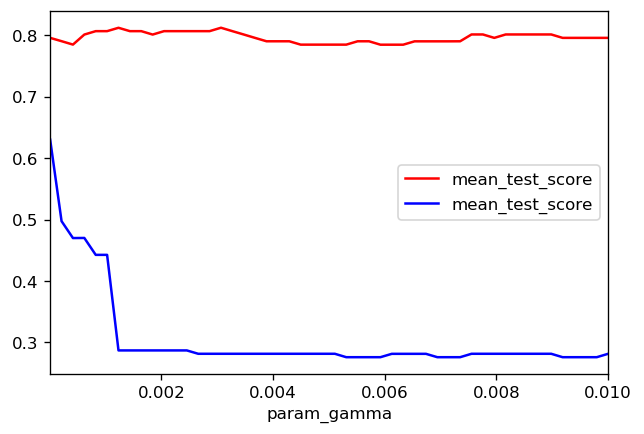

In [13]:
fig, ax = plt.subplots(dpi=120)    
df_rbf.plot("param_gamma", "mean_test_score", ax=ax, color="red") #rbf is the red plot
df_sigmoid.plot("param_gamma", "mean_test_score", ax=ax, color="blue") #sigmoid is the blue plot


With increasing gamma, the mean test score is deacresing in sigmoid model.
In rbf model, the value of mean test error started from 0.8 and it almost remains there (with some minor changes in between)